In [62]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv("mouse_drug_data.csv")
drug_data_df = pd.read_csv("clinicaltrial_data.csv")
# Combine the data into a single dataset
mouse_drug_data_df = pd.merge(drug_data_df, mouse_data_df, how= "right", on = "Mouse ID")

# Display the data table for preview
mouse_drug_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [63]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
time_tumor_drug = mouse_drug_data_df.drop(columns=['Mouse ID', 'Metastatic Sites'])
time_tumor_drug_df = pd.DataFrame(time_tumor_drug)
time_mean_drug = time_tumor_drug_df.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
time_mean_drug_df = pd.DataFrame(time_mean_drug)
time_mean_drug_df.columns = ['Mean of Tumor Volume']
# Preview DataFrame
time_mean_drug_df.head()


Mean of Tumor Volume
Drug      Timepoint                      
Capomulin 0                     45.000000
          5                     44.266086
          10                    43.084291
          15                    42.064317
          20                    40.716325

In [64]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
time_sem_drug = time_tumor_drug_df.groupby(['Drug', "Timepoint"]).sem()
# Convert to DataFrame
time_sem_drug_df = pd.DataFrame(time_sem_drug)
time_sem_drug_df.columns = ['Standard Error of Mean']
# Preview DataFrame
time_sem_drug_df.head()

Standard Error of Mean
Drug      Timepoint                        
Capomulin 0                        0.000000
          5                        0.448593
          10                       0.702684
          15                       0.838617
          20                       0.909731

In [65]:
# Minor Data Munging to Re-Format the Data Frames
drug_mean_sem = pd.concat([time_mean_drug_df, time_sem_drug_df], axis=1)
drug_mean_sem_df = pd.DataFrame(drug_mean_sem)
# Preview that Reformatting worked
pivot_df = drug_mean_sem_df.pivot_table(index='Timepoint', columns='Drug')['Mean of Tumor Volume']
pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [66]:
pivot_sem_df = drug_mean_sem_df.pivot_table(index='Timepoint', columns='Drug')['Standard Error of Mean']
pivot_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


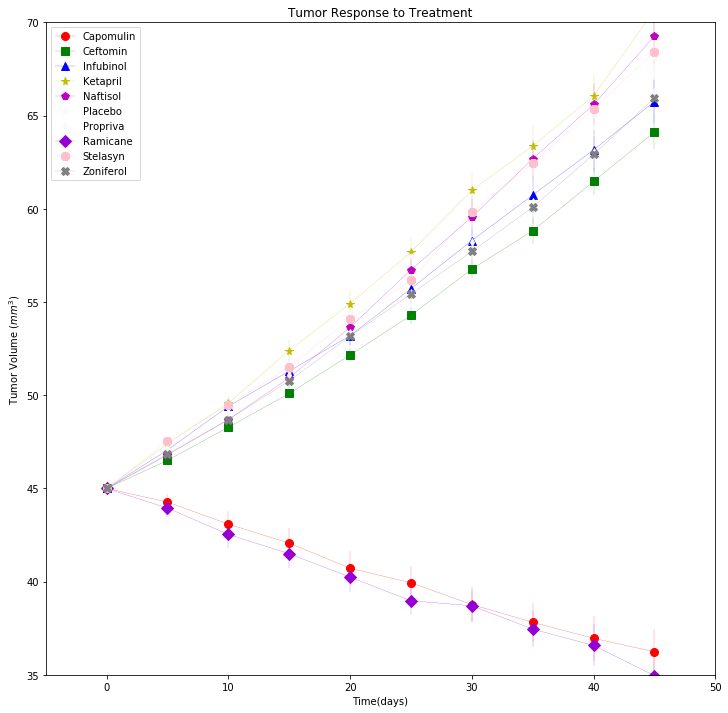

In [67]:
# Generate the Plot (with Error Bars)

capomulin= pivot_df['Capomulin'].tolist()
ceftamin= pivot_df['Ceftamin'].tolist()
infubinol= pivot_df['Infubinol'].tolist()
ketapril= pivot_df['Ketapril'].tolist()
naftisol= pivot_df['Naftisol'].tolist()
placebo= pivot_df['Placebo'].tolist()
propriva= pivot_df['Propriva'].tolist()
ramicane=pivot_df['Ramicane'].tolist()
stelasyn= pivot_df['Stelasyn'].tolist()
zoniferol= pivot_df['Zoniferol'].tolist()

cap_sem=pivot_sem_df['Capomulin'].tolist()
cef_sem=pivot_sem_df['Ceftamin'].tolist()
inf_sem=pivot_sem_df['Infubinol'].tolist()
ket_sem=pivot_sem_df['Ketapril'].tolist()
naf_sem=pivot_sem_df['Naftisol'].tolist()
pla_sem=pivot_sem_df['Placebo'].tolist()
pro_sem=pivot_sem_df['Propriva'].tolist()
ram_sem=pivot_sem_df['Ramicane'].tolist()
ste_sem=pivot_sem_df['Stelasyn'].tolist()
zon_sem=pivot_sem_df['Zoniferol'].tolist()

timepoint= pivot_df.index.tolist()

fig, ax = plt.subplots()
fig.set_size_inches(12,12)

ax1 = plt.errorbar(x=timepoint, y=capomulin, yerr=cap_sem, linestyle='-', linewidth=0.2, c='r', fmt='o', markersize='8', label='Capomulin');
            
ax2 = plt.errorbar(x=timepoint, y=ceftamin, yerr=cef_sem, linestyle='-', linewidth=0.2, fmt='s', color='g', markersize='8', label='Ceftomin');

ax3 = plt.errorbar(x=timepoint, y=infubinol, yerr=inf_sem, linestyle='-', linewidth=0.2, fmt='^', color='b', markersize='8', label='Infubinol');

ax4 = plt.errorbar(x=timepoint, y=ketapril, yerr=ket_sem, linestyle='-', linewidth=0.2, fmt='*', color='y', markersize='8', label='Ketapril');

ax5 = plt.errorbar(x=timepoint, y=naftisol, yerr=naf_sem, linestyle='-', linewidth=0.2, fmt='p', color='m',markersize='8', label='Naftisol');

ax6 = plt.errorbar(x=timepoint, y=placebo, yerr=pla_sem, linestyle='-', linewidth=0.2, fmt='h', markersize='5', color='8', label='Placebo');

ax7 = plt.errorbar(x=timepoint, y=propriva, yerr=pro_sem, linestyle='-', linewidth=0.2, fmt='d', markersize='5',  color='8', label='Propriva');

ax8 = plt.errorbar(x=timepoint, y=ramicane, yerr=ram_sem, linestyle='-', linewidth=0.2, fmt='D', markersize='8', color='darkviolet', label='Ramicane');

ax9 = plt.errorbar(x=timepoint, y=stelasyn, yerr=ste_sem, linestyle='-', linewidth=0.2, fmt='8', markersize='8', color='pink', label='Stelasyn');

ax3 = plt.errorbar(x=timepoint, y=zoniferol, yerr=zon_sem, linestyle='-', linewidth=0.2, fmt='X', markersize='8', color='gray', label='Zoniferol');

ax.set_xlim(-5, 50)
ax.set_ylim(35, 70)
ax.set_title('Tumor Response to Treatment')
ax.set_xlabel("Time(days)")
ax.set_ylabel("Tumor Volume ($mm^{3}$)")

plt.legend(loc="best", fontsize="medium", fancybox=True)

# Save the Figure
plt.savefig('MeanTumorVolume.png')

plt.show()

In [68]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
time_site_drug = mouse_drug_data_df.drop(columns=['Mouse ID', 'Tumor Volume (mm3)'])
time_site_drug_df = pd.DataFrame(time_site_drug)
time_site_mean_drug = time_site_drug_df.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
time_mean_site_drug_df = pd.DataFrame(time_site_mean_drug)
time_mean_site_drug_df.columns = ['Mean of Metastatic Sites']

# Preview DataFrame
time_mean_site_drug_df.head()

Mean of Metastatic Sites
Drug      Timepoint                          
Capomulin 0                          0.000000
          5                          0.160000
          10                         0.320000
          15                         0.375000
          20                         0.652174

In [69]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
time_sem_site = time_site_drug_df.groupby(['Drug', 'Timepoint']).sem()
# Convert to DataFrame
time_sem_site_df = pd.DataFrame(time_sem_site)
time_sem_site_df.columns = ['Standard Error of Mean']
# Preview DataFrame
time_sem_site_df.head()

Standard Error of Mean
Drug      Timepoint                        
Capomulin 0                        0.000000
          5                        0.074833
          10                       0.125433
          15                       0.132048
          20                       0.161621

In [70]:
# Minor Data Munging to Re-Format the Data Frames
pivot_site_df = time_mean_site_drug_df.pivot_table(index= 'Timepoint', columns= 'Drug')['Mean of Metastatic Sites']
# Preview that Reformatting worked   
pivot_site_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [71]:
pivot_site_sem_df = time_sem_site_df.pivot_table(index= 'Timepoint', columns= 'Drug')['Standard Error of Mean']
pivot_site_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


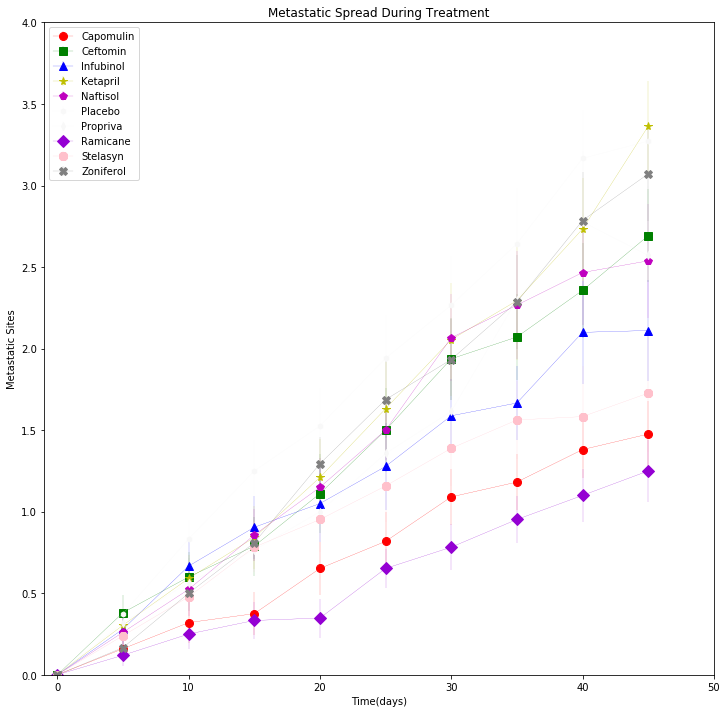

In [72]:
# Generate the Plot (with Error Bars)
capomulin_site = pivot_site_df['Capomulin'].tolist()
ceftamin_site = pivot_site_df['Ceftamin'].tolist()
infubinol_site = pivot_site_df['Infubinol'].tolist()
ketapril_site = pivot_site_df['Ketapril'].tolist()
naftisol_site = pivot_site_df['Naftisol'].tolist()
placebo_site = pivot_site_df['Placebo'].tolist()
propriva_site = pivot_site_df['Propriva'].tolist()
ramicane_site = pivot_site_df['Ramicane'].tolist()
stelasyn_site = pivot_site_df['Stelasyn'].tolist()
zoniferol_site = pivot_site_df['Zoniferol'].tolist()

cap_site_sem = pivot_site_sem_df['Capomulin'].tolist()
cef_site_sem = pivot_site_sem_df['Ceftamin'].tolist()
inf_site_sem = pivot_site_sem_df['Infubinol'].tolist()
ket_site_sem = pivot_site_sem_df['Ketapril'].tolist()
naf_site_sem = pivot_site_sem_df['Naftisol'].tolist()
pla_site_sem = pivot_site_sem_df['Placebo'].tolist()
pro_site_sem = pivot_site_sem_df['Propriva'].tolist()
ram_site_sem = pivot_site_sem_df['Ramicane'].tolist()
ste_site_sem = pivot_site_sem_df['Stelasyn'].tolist()
zon_site_sem = pivot_site_sem_df['Zoniferol'].tolist()

fig, ax = plt.subplots()
fig.set_size_inches(12,12)

ax1 = plt.errorbar(x=timepoint, y=capomulin_site, yerr=cap_site_sem, linestyle='-', linewidth=0.2, c='r', fmt='o', markersize='8', label='Capomulin');
            
ax2 = plt.errorbar(x=timepoint, y=ceftamin_site, yerr=cef_site_sem, linestyle='-', linewidth=0.2, fmt='s', color='g', markersize='8', label='Ceftomin');

ax3 = plt.errorbar(x=timepoint, y=infubinol_site, yerr=inf_site_sem, linestyle='-', linewidth=0.2, fmt='^', color='b', markersize='8', label='Infubinol');

ax4 = plt.errorbar(x=timepoint, y=ketapril_site, yerr=ket_site_sem, linestyle='-', linewidth=0.2, fmt='*', color='y', markersize='8', label='Ketapril');

ax5 = plt.errorbar(x=timepoint, y=naftisol_site, yerr=naf_site_sem, linestyle='-', linewidth=0.2, fmt='p', color='m',markersize='8', label='Naftisol');

ax6 = plt.errorbar(x=timepoint, y=placebo_site, yerr=pla_site_sem, linestyle='-', linewidth=0.2, fmt='h', markersize='5', color='8', label='Placebo');

ax7 = plt.errorbar(x=timepoint, y=propriva_site, yerr=pro_site_sem, linestyle='-', linewidth=0.2, fmt='d', markersize='5',  color='8', label='Propriva');

ax8 = plt.errorbar(x=timepoint, y=ramicane_site, yerr=ram_site_sem, linestyle='-', linewidth=0.2, fmt='D', markersize='8', color='darkviolet', label='Ramicane');

ax9 = plt.errorbar(x=timepoint, y=stelasyn_site, yerr=ste_site_sem, linestyle='-', linewidth=0.2, fmt='8', markersize='8', color='pink', label='Stelasyn');

ax3 = plt.errorbar(x=timepoint, y=zoniferol_site, yerr=zon_site_sem, linestyle='-', linewidth=0.2, fmt='X', markersize='8', color='gray', label='Zoniferol');

ax.set_xlim(-1, 50)
ax.set_ylim(0, 4)
ax.set_title('Metastatic Spread During Treatment')
ax.set_xlabel("Time(days)")
ax.set_ylabel("Metastatic Sites")

plt.legend(loc="best", fontsize="medium", fancybox=True)
# Save the Figure
plt.savefig('metastatic_spread.png')
# Show the Figure
plt.show()


In [73]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse=  mouse_drug_data_df.drop(columns=['Tumor Volume (mm3)', 'Metastatic Sites'])
mouse_df = pd.DataFrame(mouse)
mouse_survival = mouse_df.groupby(['Drug', 'Timepoint']).count()
# Convert to DataFrame
mouse_survival_df = pd.DataFrame(mouse_survival)
# Preview DataFrame
mouse_survival_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [74]:
# Minor Data Munging to Re-Format the Data Frames
mouse_pivot = mouse_survival_df.pivot_table(index='Timepoint', columns='Drug')['Mouse ID']
# Preview the Data Frame
mouse_pivot_df = pd.DataFrame(mouse_pivot)
mouse_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


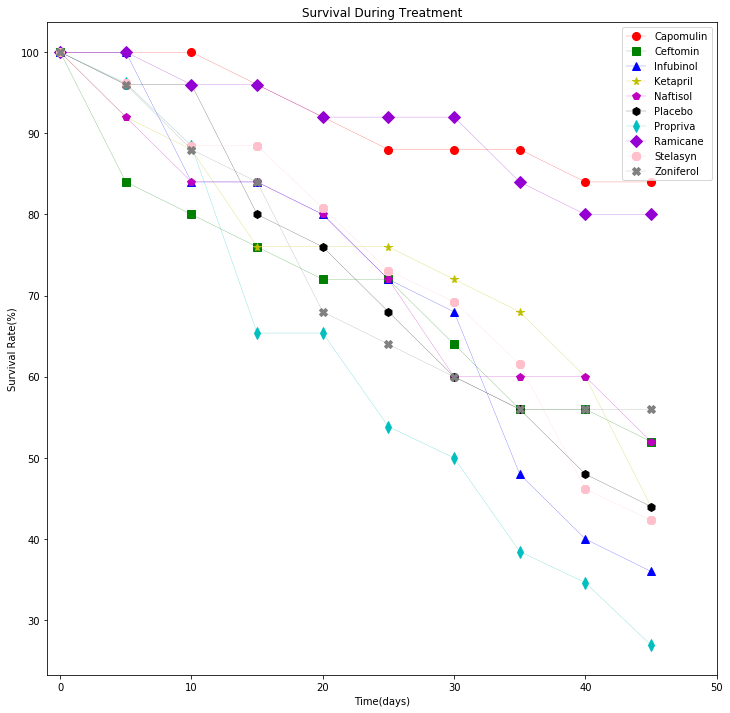

In [76]:
# Generate the Plot (Accounting for percentages)
capomulin_mouse = mouse_pivot_df['Capomulin'].tolist()
ceftamin_mouse = mouse_pivot_df['Ceftamin'].tolist()
infubinol_mouse = mouse_pivot_df['Infubinol'].tolist()
ketapril_mouse = mouse_pivot_df['Ketapril'].tolist()
naftisol_mouse = mouse_pivot_df['Naftisol'].tolist()
placebo_mouse = mouse_pivot_df['Placebo'].tolist()
propriva_mouse = mouse_pivot_df['Propriva'].tolist()
ramicane_mouse = mouse_pivot_df['Ramicane'].tolist()
stelasyn_mouse = mouse_pivot_df['Stelasyn'].tolist()
zoniferol_mouse = mouse_pivot_df['Zoniferol'].tolist()

def mouse_percent(x):
    y= []
    for i in range(len(x)):
        j = x[i]/max(x)*100
        y.append(j)
    return y

cap_percent = mouse_percent(capomulin_mouse)
cef_percent = mouse_percent(ceftamin_mouse)
inf_percent = mouse_percent(infubinol_mouse)
ket_percent = mouse_percent(ketapril_mouse)
naf_percent = mouse_percent(naftisol_mouse)
pla_percent = mouse_percent(placebo_mouse)
pro_percent = mouse_percent(propriva_mouse)
ram_percent = mouse_percent(ramicane_mouse)
ste_percent = mouse_percent(stelasyn_mouse)
zon_percent = mouse_percent(zoniferol_mouse)

import matplotlib.ticker as ticker
fig, ax = plt.subplots()
fig.set_size_inches(12,12)

ax1 = plt.errorbar(x=timepoint, y=cap_percent, linestyle='-', linewidth=0.2, fmt='o', color='r', markersize='8', label='Capomulin');
            
ax2 = plt.errorbar(x=timepoint, y=cef_percent, linestyle='-', linewidth=0.2, fmt='s', color='g', markersize='8', label='Ceftomin');

ax3 = plt.errorbar(x=timepoint, y=inf_percent, linestyle='-', linewidth=0.2, fmt='^', color='b', markersize='8', label='Infubinol');

ax4 = plt.errorbar(x=timepoint, y=ket_percent, linestyle='-', linewidth=0.2, fmt='*', color='y', markersize='8', label='Ketapril');

ax5 = plt.errorbar(x=timepoint, y=naf_percent, linestyle='-', linewidth=0.2, fmt='p', color='m',markersize='8', label='Naftisol');

ax6 = plt.errorbar(x=timepoint, y=pla_percent, linestyle='-', linewidth=0.2, fmt='h', markersize='8', color='k', label='Placebo');

ax7 = plt.errorbar(x=timepoint, y=pro_percent,  fmt='d', linestyle='-', linewidth=0.2, markersize='8',  color='c', label='Propriva');

ax8 = plt.errorbar(x=timepoint, y=ram_percent,  fmt='D', linestyle='-', linewidth=0.2, markersize='8', color='darkviolet', label='Ramicane');

ax9 = plt.errorbar(x=timepoint, y=ste_percent,  fmt='8', linestyle='-', linewidth=0.2, markersize='8', color='pink', label='Stelasyn');

ax3 = plt.errorbar(x=timepoint, y=zon_percent,  fmt='X', linestyle='-', linewidth=0.2, markersize='8', color='gray', label='Zoniferol');

ax.set_xlim(-1, 50)
ax.set_title('Survival During Treatment')
ax.set_xlabel("Time(days)")
ax.set_ylabel("Survival Rate(%)")

plt.legend(loc="best", fontsize="medium", fancybox=True)
# Save the Figure
plt.savefig('survival_percentage.png')
# Show the Figure
plt.show()

In [77]:
# Calculate the percent changes for each drug
head_tail = pd.concat([pivot_df.head(1), pivot_df.tail(1)])
head_tail_df = pd.DataFrame(head_tail)
percent_change = head_tail_df.pct_change()
percent_change_df = pd.DataFrame(percent_change)
# Display the data to confirm
percent_change_100 = (percent_change_df.sum())*100
percent_change_100_df = pd.DataFrame(percent_change_100)
percent_change_100_df

,0
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [78]:
# Store all Relevant Percent Changes into a Tuple(I preffered lists in this case)

drug_list = percent_change_100_df.index.tolist()
percent_list = percent_change_100_df[0].tolist()

# Splice the data between passing and failing drugs

succesful = []
failed = []
reduced = []
increased = []
for i in range(len(percent_tuple)):
    if percent_tuple[i] < 0:
        succesful.append(drug_list[i])
        reduced.append(percent_list[i])
    else:
        failed.append(drug_list[i])
        increased.append(percent_list[i])
        
print(f"The following drugs resulted in a reduction of tumor volume during treatment: " + str(succesful))
print(f"The following drugs did not result in a reduction of tumor volume during treatment" + str(failed))

The following drugs resulted in a reduction of tumor volume during treatment: ['Capomulin', 'Ramicane']
The following drugs did not result in a reduction of tumor volume during treatment['Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol']


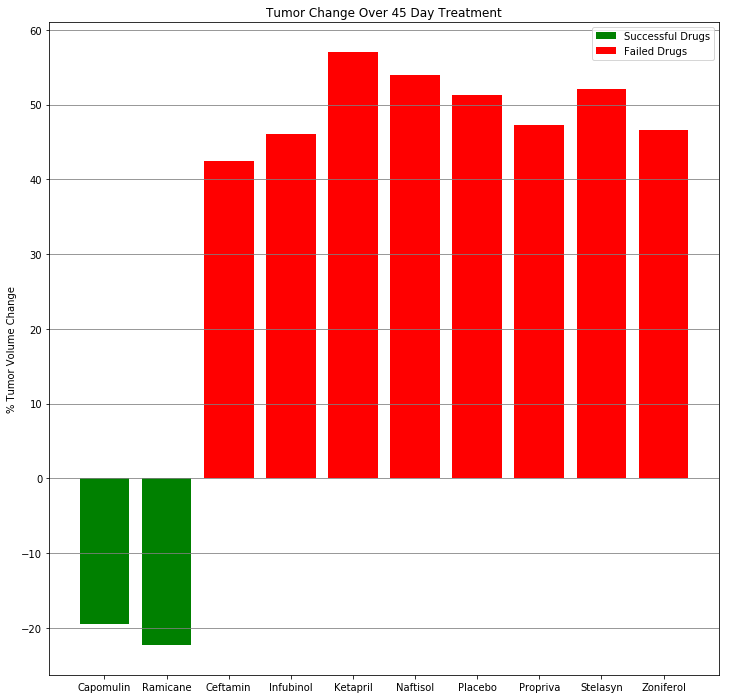

In [79]:
# Orient widths. Add labels, tick marks, etc.
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
ax.yaxis.grid(color='gray')

ax1 = plt.bar(x=succesful, height=reduced, color='green', label='Successful Drugs')
ax2 =plt.bar(x=failed, height=increased, color='red', label='Failed Drugs')

ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_ylabel('% Tumor Volume Change')
plt.legend(loc="best", fontsize="medium", fancybox=True)

# Save the Figure
plt.savefig('Tumor_Change_Tx.png')

# Show the Figure
plt.show()

In [ ]:
#Three Observable Trends:

#1. Both Ramicane and Capomulin were effective in reducing tumor volume over the treatment period. All other drugs performed similarly to the placebo

#2. All drugs saw mice treated with them die during treatment. However Ramicane and Capomulin saw the lowest death rates. Therefore using Capomulin or Ramicane posed less risk to the mice over a 45 day period than leaving the tumors untreated or treating with the other drugs.

#3. Capomulin and Ramicane had the slowest rates of metastatic spread over the 45 day treatment, although they didn't reverse the spread over that time.

# Ramicane and Capomulin should be evaluated in further trials. I would not recommend proceeding with trials on the other drugs.

